In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('Dataset\weight-height_KNN.csv')
data.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [22]:
df=data
columns=['Gender']
df = df.drop(columns, axis=1)
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971110
8,67.018950,175.929440
9,63.456494,156.399676


In [23]:
Xm=df[0:25]
Xf=df[5001:5026]
frame=[Xm,Xf]

In [24]:
X_train=pd.concat(frame)
X_train=np.array(X_train)
print(X_train)
print(X_train.shape)
lbl=data['Gender']

[[ 73.84701702 241.89356318]
 [ 68.78190405 162.31047252]
 [ 74.11010539 212.74085556]
 [ 71.7309784  220.0424703 ]
 [ 69.88179586 206.34980062]
 [ 67.25301569 152.21215576]
 [ 68.78508125 183.9278886 ]
 [ 68.34851551 167.97111049]
 [ 67.01894966 175.9294404 ]
 [ 63.45649398 156.39967639]
 [ 71.19538228 186.60492556]
 [ 71.64080512 213.74116949]
 [ 64.76632913 167.12746107]
 [ 69.2830701  189.44618139]
 [ 69.24373223 186.43416802]
 [ 67.6456197  172.18693006]
 [ 72.41831663 196.02850633]
 [ 63.97432572 172.88347021]
 [ 69.6400599  185.98395757]
 [ 67.93600485 182.42664801]
 [ 67.91505019 174.11592908]
 [ 69.43943987 197.73142161]
 [ 66.14913196 149.17356601]
 [ 75.20597361 228.76178062]
 [ 67.89319634 162.00665185]
 [ 65.23001251 141.3058226 ]
 [ 63.36900376 131.04140269]
 [ 64.47999743 128.17151122]
 [ 61.79309615 129.78140705]
 [ 65.96801895 156.80208261]
 [ 62.85037864 114.96903825]
 [ 65.65215644 165.08300121]
 [ 61.89023374 111.67619921]
 [ 63.67786815 104.15155964]
 [ 68.10117224

In [25]:
ym=lbl[0:25]
yf=lbl[5001:5026]
frames=[ym,yf]
Y_train=pd.concat(frames)
Y_train=np.array(Y_train)
print(Y_train)
print(Y_train.shape)
label=data['Gender']

['Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female']
(50,)


In [26]:
lb=label[400:410]
lc=label[9000:9010]
frames=[lb,lc]
Y=pd.concat(frames)
Y=np.array(Y)
print(Y)

['Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female']


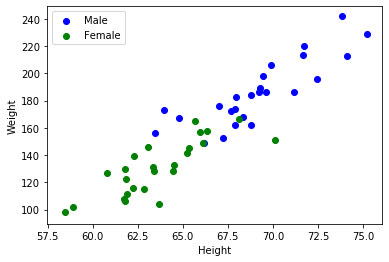

In [37]:
x = data['Height']
y=data['Weight']
male=x[0:25]
female=x[5001:5026]
wm=y[0:25]
wf=y[5001:5026]
plt.scatter(male,wm, color='b')
plt.scatter(female,wf,color='g')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(["Male", "Female"])
plt.show()

In [14]:
testx=df[400:410]
testy=df[9000:9010]
frames=[testx,testy]
X=pd.concat(frames)
X=np.array(X)
print(X)
print(X.shape)

[[ 69.97090362 202.86329303]
 [ 65.31346154 163.35733152]
 [ 71.90600544 217.02771464]
 [ 66.23390404 183.16123246]
 [ 65.81494282 166.58361051]
 [ 72.84494786 205.25088915]
 [ 70.94944345 189.70308882]
 [ 71.34380763 218.5863364 ]
 [ 71.05566416 203.13943303]
 [ 61.92554729 139.90507032]
 [ 58.52542646 107.79249645]
 [ 60.34078108 111.07775447]
 [ 61.43391285  97.05854929]
 [ 65.47590249 154.4408869 ]
 [ 60.48444501 121.79779334]
 [ 62.00031639 117.04835397]
 [ 59.66765209 114.3868654 ]
 [ 63.80329944 124.81306876]
 [ 62.86838051 132.69486866]
 [ 66.40655275 161.17621832]]
(20, 2)


In [15]:
def predict(input_feature_set, k):
    distances = []
    z = 0
    for training_feature_set in X_train:
        group = Y_train[z]
        # print("Group=",group)
        # print("Training Feature=",training_feature_set)
        euclidean_distance = np.linalg.norm(np.array(input_feature_set) - np.array(training_feature_set))
        # print("Distance=",euclidean_distance)
        distances.append([euclidean_distance, group])
        z = z + 1
        # print(z)

    nearest = sorted(distances)[:k]
    # print("Sorted=",nearest)
    votes = []
    # votes = [d[1] for d in nearest]
    for d in nearest:
        votes.append(d[1])
    # print(votes)
    # prediction = Counter(votes).most_common(1)[0][0]
    item = {}
    for i in votes:
        if i in item:
            item[i] = item[i] + 1
        else:
            item[i] = 1

    # finding most common class
    m = 0
    for k in item:
        if item[k] > m:
            m = item[k]

    for k in item:
        if item[k] == m:
            index = k

    prediction = index

    return prediction

In [16]:
#Training
toutput=[]
for j in X_train:
    predicted=predict(j,3)
    toutput.append(predicted)
print("Output=",toutput)
print(len(toutput))

Output= ['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female']
50


In [17]:
c=0
for p in range(0,50):
        if toutput[p]==Y_train[p]:
            c=c+1
result=(c/50.0)*100
print("Training Accuracy=",result,"%")

Training Accuracy= 94.0 %


In [18]:
output=[]
for j in X:
    predicted=predict(j,3)
    output.append(predicted)
print("Output=",output)

Output= ['Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male']


In [19]:
c=0
for p in range(0,20):
        if output[p]==Y[p]:
            c=c+1
result=(c/20.0)*100
print("Testing Accuracy=",result,"%")


Testing Accuracy= 80.0 %
